In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Let's check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Check the shape of the DataFrame (rows, columns)
df.shape

(398, 9)

In [5]:
# Let's look at some statistical information about the dataframe.
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
# Replacing the categorical var with actual values.
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


# Exploratory Data Analysis

# 1.Create Dummy Variables

In [7]:
df = pd.get_dummies(df,columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


# 2.Dealing with Missing Values

In [8]:
df.isna().sum()*100/398

mpg               0.0
cylinders         0.0
displacement      0.0
horsepower        0.0
weight            0.0
acceleration      0.0
model year        0.0
car name          0.0
origin_america    0.0
origin_asia       0.0
origin_europe     0.0
dtype: float64

No missing values

# 3.Cleaning the Data

### Removing ? from hp and converting its data type to INT

In [9]:
# Missing values have a '?'

# Replace missing values with NaN
df['horsepower'] = df['horsepower'].replace('?',np.nan)

#Converting data type from string to float
df['horsepower'] = df['horsepower'].astype(float)

#lets replace the missing values with median value.
df['horsepower'] = df['horsepower'].replace(np.nan,df['horsepower'].median())

#Converting data type from float to int
df['horsepower'] = df['horsepower'].astype(int)

# 4.Visualization

## Univariate Analysis

### a.)Bar Plot for car name

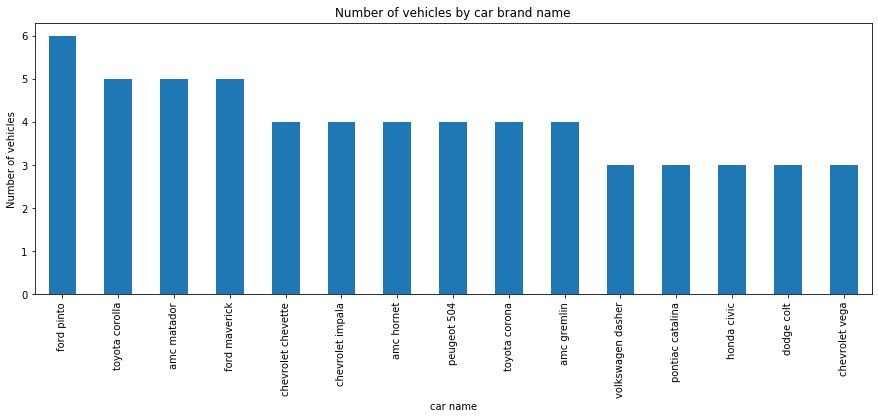

In [11]:
df['car name'].value_counts().nlargest(15).plot(kind = 'bar',figsize = (15,5))
plt.title("Number of vehicles by car brand name")
plt.ylabel('Number of vehicles')
plt.xlabel('car name');

Ford Pinto is the car name which has most number of vehicles and Ford Marverick holds the second poisition

### b.)Histogram for mpg

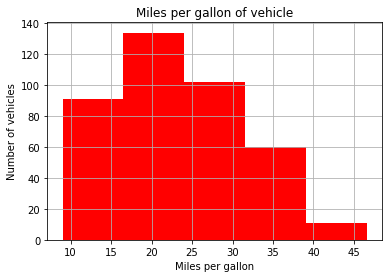

In [12]:
df['mpg'].hist(bins = 5,color = 'red')
plt.title('Miles per gallon of vehicle')
plt.ylabel('Number of vehicles')
plt.xlabel('Miles per gallon');

### c.)Histogram for cylinders

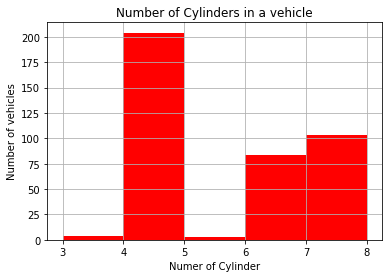

In [13]:
df['cylinders'].hist(bins = 5,color = 'red')
plt.title("Number of Cylinders in a vehicle")
plt.ylabel('Number of vehicles')
plt.xlabel('Numer of Cylinder');

Maximum number of cars are having cylinder between 4 to 5

### d.)Histogram for displacement

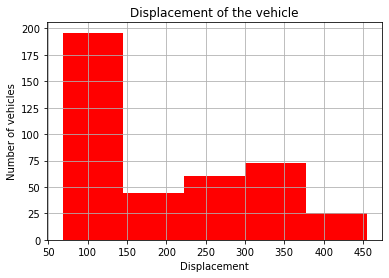

In [14]:
df['displacement'].hist(bins = 5,color = 'red')
plt.title("Displacement of the vehicle")
plt.ylabel('Number of vehicles')
plt.xlabel('Displacement');

Maximum number of cars are having dispalcement between 70 to 140

### e.)Histogram for weight

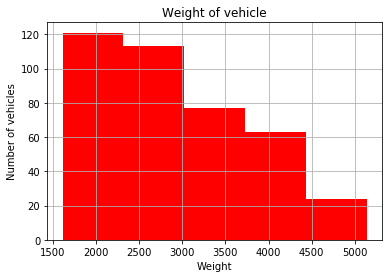

In [15]:
df['weight'].hist(bins = 5,color = 'red')
plt.title("Weight of vehicle")
plt.ylabel('Number of vehicles')
plt.xlabel('Weight');

Max weight of car are between 1600 to 3000

### f.)Histogram for acceleration

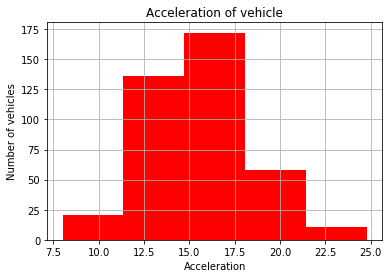

In [16]:
df['acceleration'].hist(bins = 5,color = 'red')
plt.title("Acceleration of vehicle")
plt.ylabel('Number of vehicles')
plt.xlabel('Acceleration');

General acceleration of cars are between 15.0 to 18.0

### g.)Histogram for model year

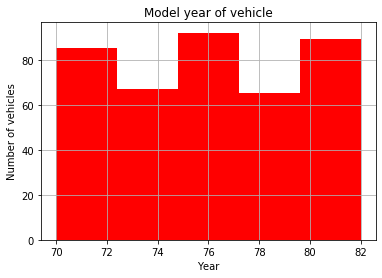

In [17]:
df['model year'].hist(bins = 5,color = 'red')
plt.title("Model year of vehicle")
plt.ylabel('Number of vehicles')
plt.xlabel('Year');

We can say that most of the cars were made during the year 1970-72, 1975-77 and 1980-82

C:\Users\Avish\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


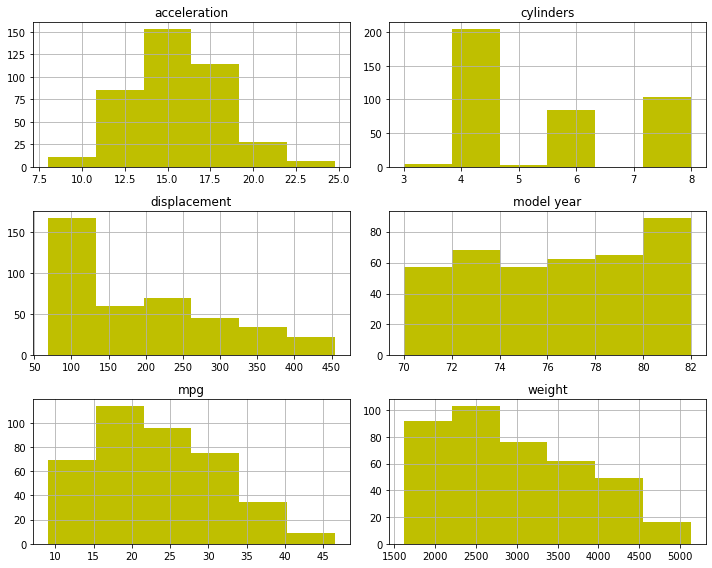

In [19]:
df[['mpg','cylinders','displacement','weight','acceleration','model year']].hist(figsize=(10,8),bins=6,color='Y')
plt.tight_layout()
plt.show()

## Bivariate Analysis

### a.)Box plot btw mpg and weight

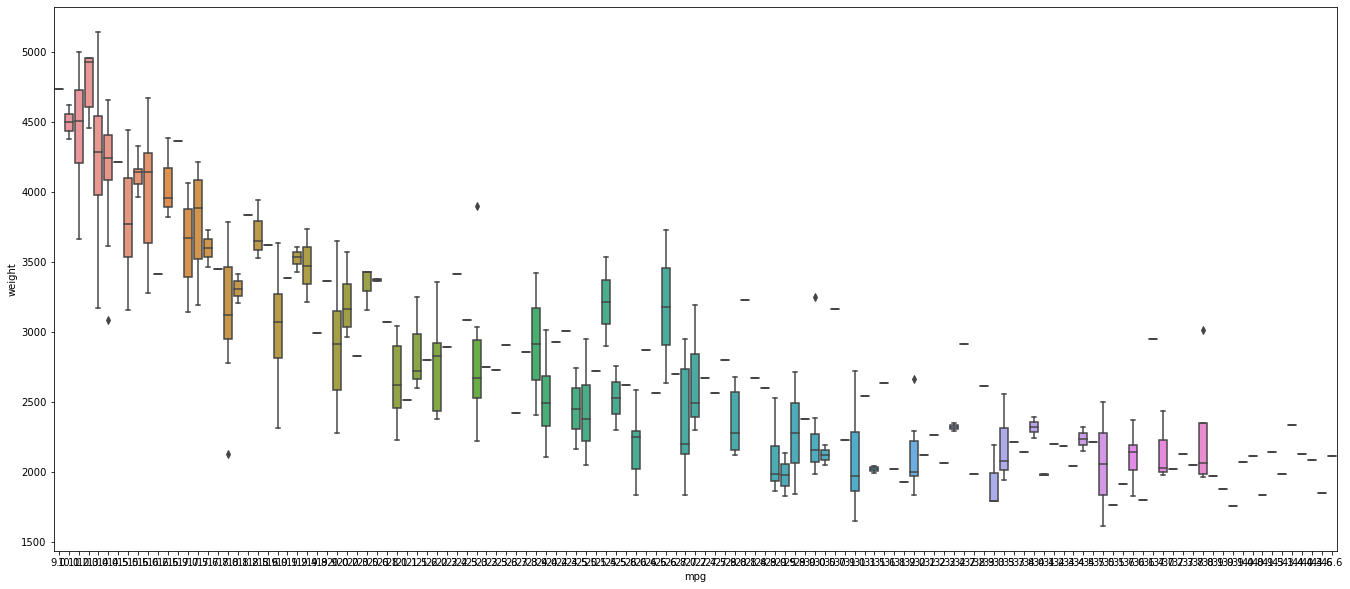

In [23]:
plt.rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x = 'mpg',y = 'weight',data = df)

We can see that as the weight of the car increases, the mileage decreases which is obvious because they are inversely proportional to each other

### b.)Box plot btw mpg and displacement

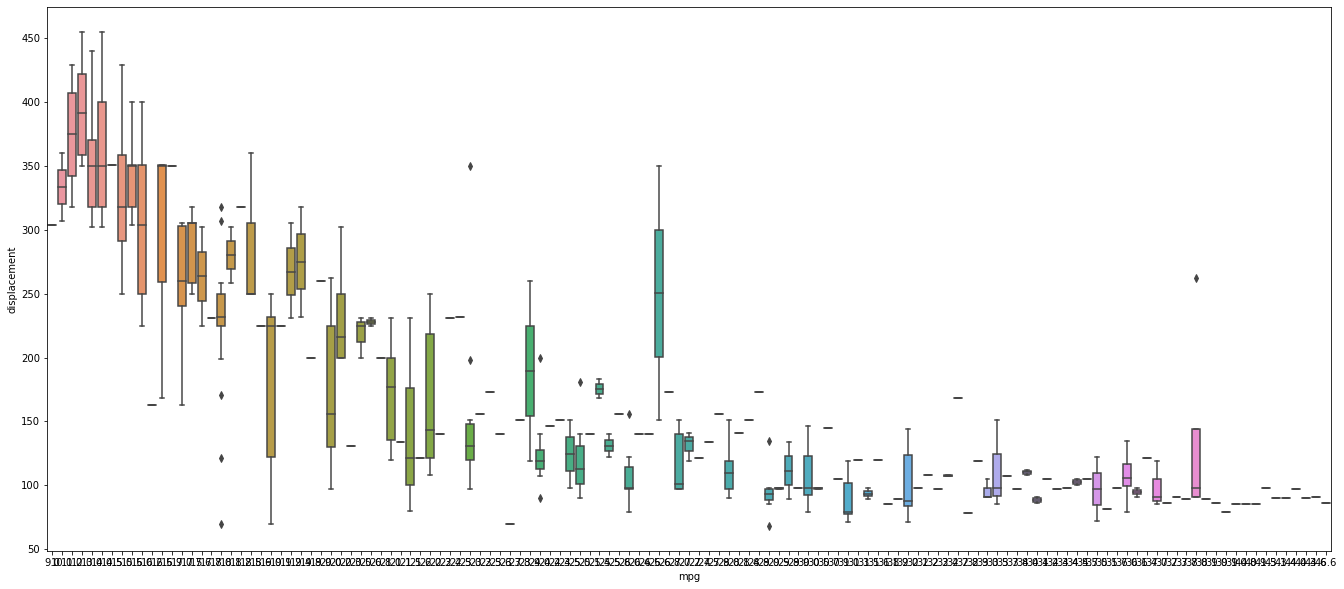

In [24]:
plt.rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x = 'mpg',y = 'displacement',data = df)

We see that as the displacement increases,mileage decreases.

### c.)Box plot btw horsepower and weight

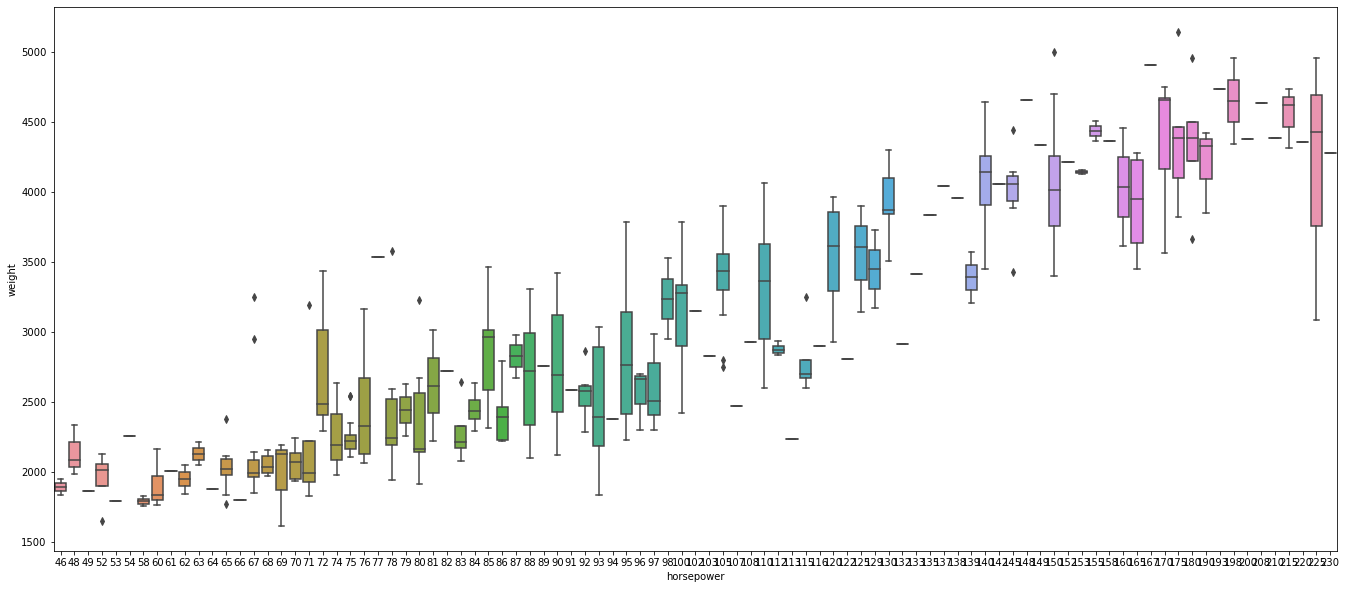

In [25]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="horsepower", y="weight", data=df)

We can clearly see that as the weight increases,the horsepower increases.Otherwise car with heavy weight won't run without greater horsepower. So they are directly proportional

### d.)Scatter plot for weight of car and acceleration

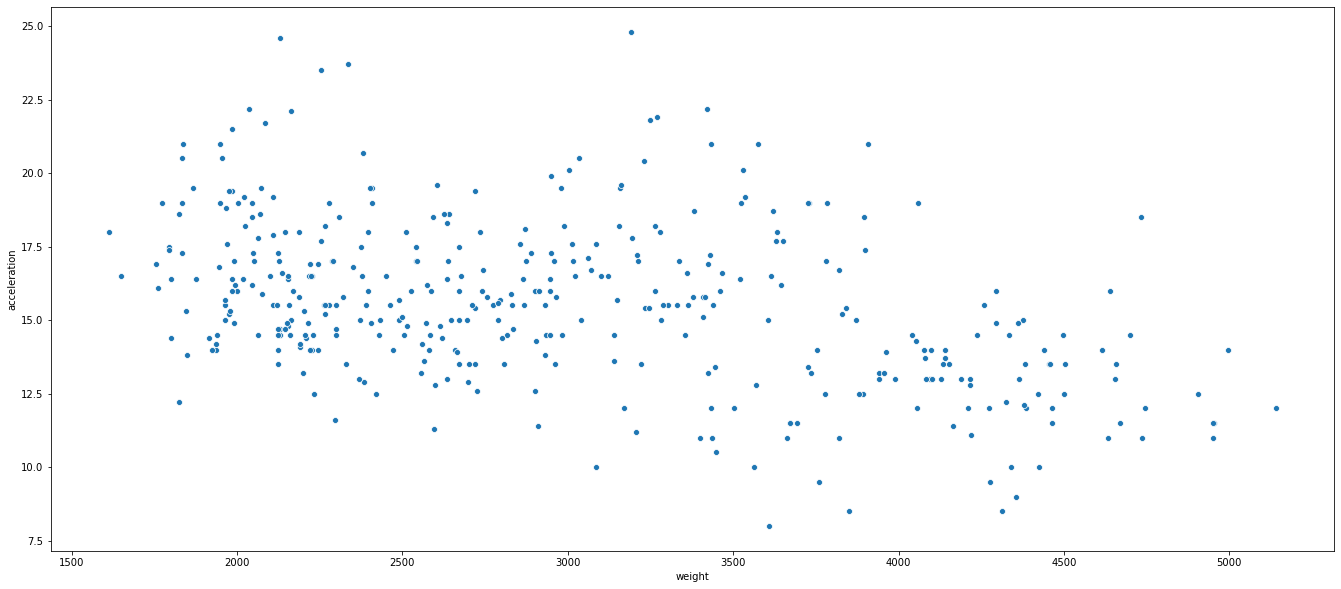

In [26]:
sns.scatterplot(x = 'weight',y = 'acceleration',data = df)

It is showing that lesser the weight of car,more is the acceleration.

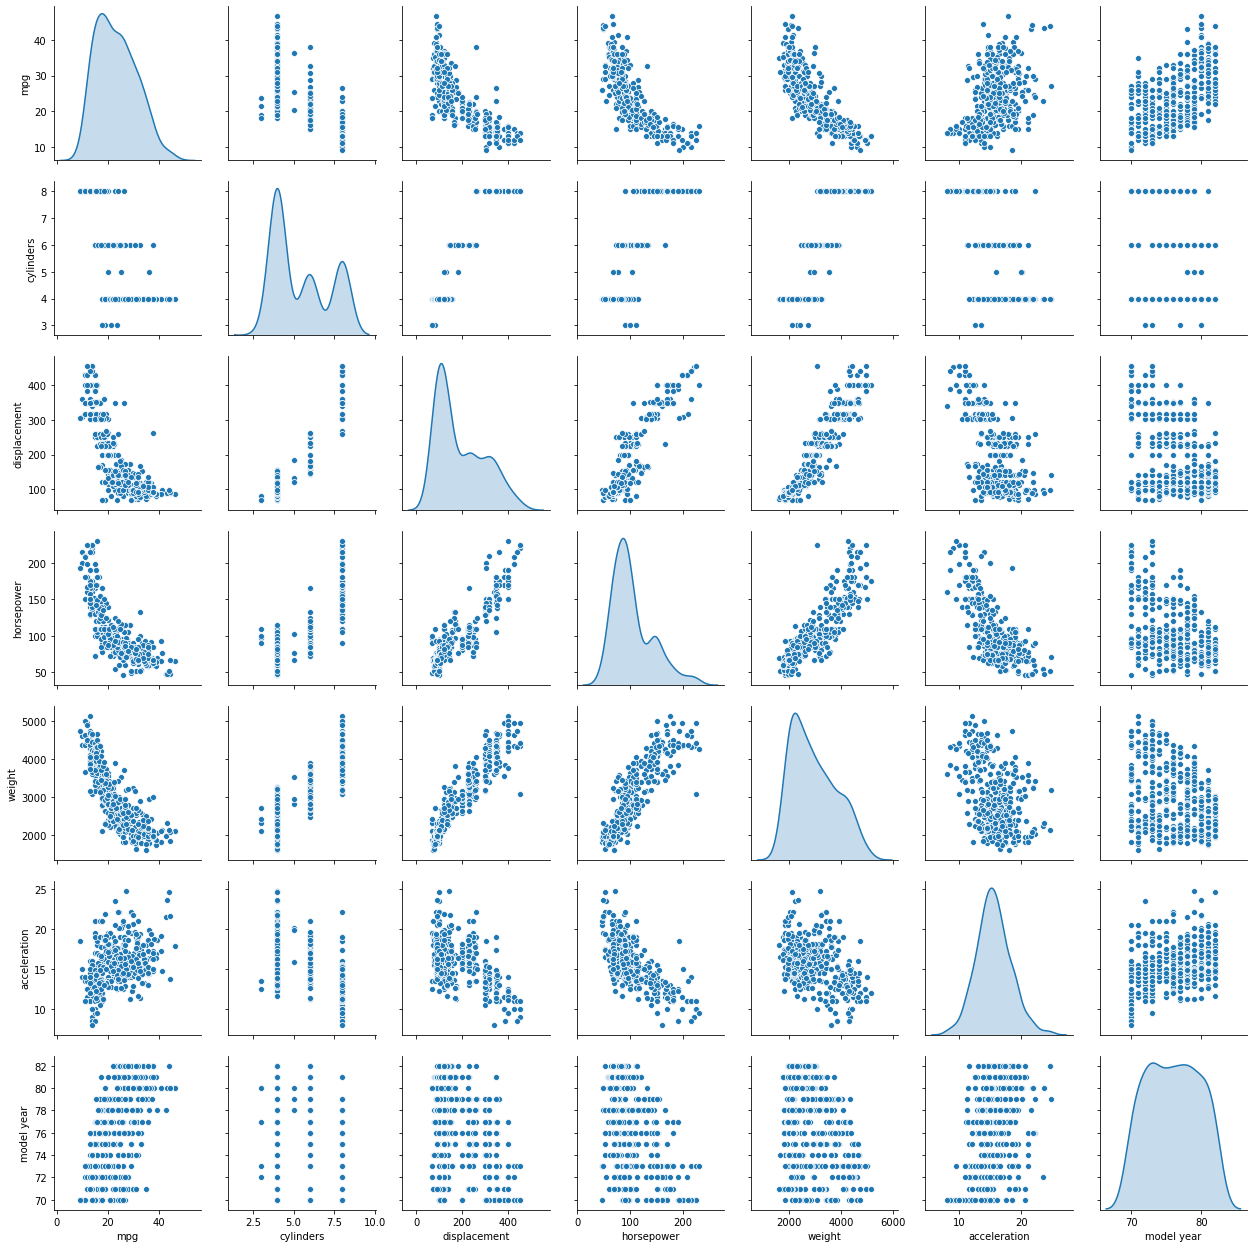

In [27]:
df_attr = df.iloc[:, 0:7]
sns.pairplot(df_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

# Correlation Analysis

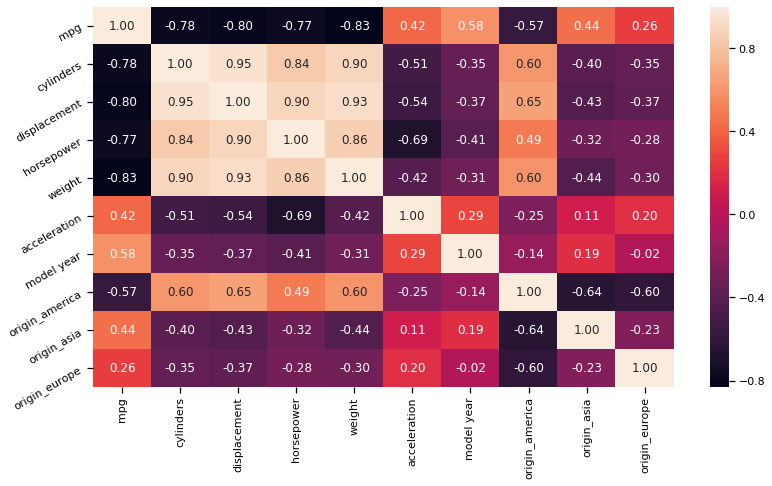

In [29]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Preparing X and y

In [30]:
#drop car name
df = df.drop('car name',axis = 1)

In [31]:
# lets build our linear model
# independant variables
# the dependent variable
y = df['mpg']
X = df.drop(['mpg','origin_europe'],axis = 1)

# Splitting Data into Training and Testing Sets

In [33]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(278, 8)
(278,)
(120, 8)
(120,)


# Fit Linear Model

In [35]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Coefficients Calculation

In [40]:
# Print the Coefficients
print(lr.coef_)

[-0.39474991  0.02894837 -0.02177415 -0.00735148  0.0618036   0.83691196
 -3.00171567 -0.60573691]


In [41]:
#Print the intercept
print(lr.intercept_)

-18.280167206942483


# Predictions

In [43]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

# Computing RMSE and R^2 Values

In [44]:
#importing the library and building the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print('r-square of Train :',r2_score(y_train,y_train_pred))
print('rmse for Train: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))

print('\n')
print('r-square of Test :',r2_score(y_test,y_test_pred))
print('rmse for Test: ',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r-square of Train : 0.8141028479576388
rmse for Train:  3.3943203374497153


r-square of Test : 0.8433220109385648
rmse for Test:  3.026628957587231


# Adding interaction terms

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9015707846031046


In [47]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8647826912044644


In [48]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)
